/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - loss: 0.3789 - val_loss: 0.2344
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2057 - val_loss: 0.1466
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1491 - val_loss: 0.1654
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1603 - val_loss: 0.1484
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1435 - val_loss: 0.1311
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1315 - val_loss: 0.1267
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1235 - val_loss: 0.1199
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1191 - val_loss: 0.1134
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1130 - val_loss: 0.1112
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1117 - val_loss: 0.1078
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1070 - val_loss: 0.1063
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1060 - val_loss: 0.1050
Epoch 

<Axes: >

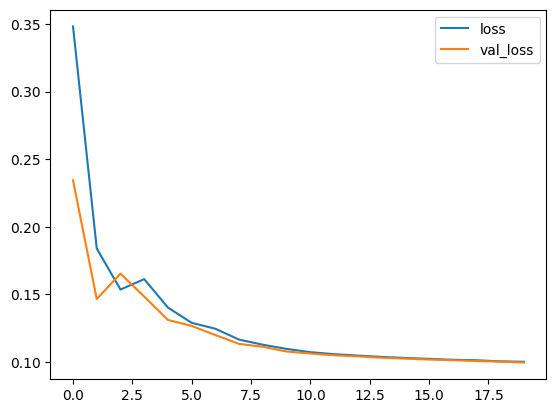

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df.head()

df.shape

train_df = df.sample(frac=0.8, random_state=40)
val_df = df.drop(train_df.index)

max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range = max_val - min_val

train_df = (train_df - min_val)/(range)
val_df = (val_df - min_val)/(range)

X_train = train_df.drop('quality', axis=1)
X_val = train_df.drop('quality', axis=1)
y_train = train_df['quality']
y_val = train_df['quality']

input_shape = [X_train.shape[1]]
input_shape

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

model.compile(optimizer = 'adam', loss = 'mae')

losses = model.fit(X_train, y_train,
                   validation_data = (X_val, y_val),
                   batch_size = 256,
                   epochs = 20)

model.predict(X_val.iloc[0:3, :])
y_val.iloc[0:3]

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss', 'val_loss']].plot()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.5267 - loss: 0.9597 - val_accuracy: 0.8333 - val_loss: 0.7472
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8069 - loss: 0.7427 - val_accuracy: 0.8889 - val_loss: 0.6017
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.5920 - val_accuracy: 0.8889 - val_loss: 0.4780
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9311 - loss: 0.4701 - val_accuracy: 0.9167 - val_loss: 0.3713
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9675 - loss: 0.3625 - val_accuracy: 0.9722 - val_loss: 0.2814
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9722 - loss: 0.2579 - val_accuracy: 0.9722 - val_loss: 0.2111
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9771 - loss: 0.2243 - val_accuracy: 0.9722 - val_loss: 0.1605
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.1982 - val_accuracy: 1.0000 - val_loss: 0.1235
Epoch 9/50
9/9 ━━

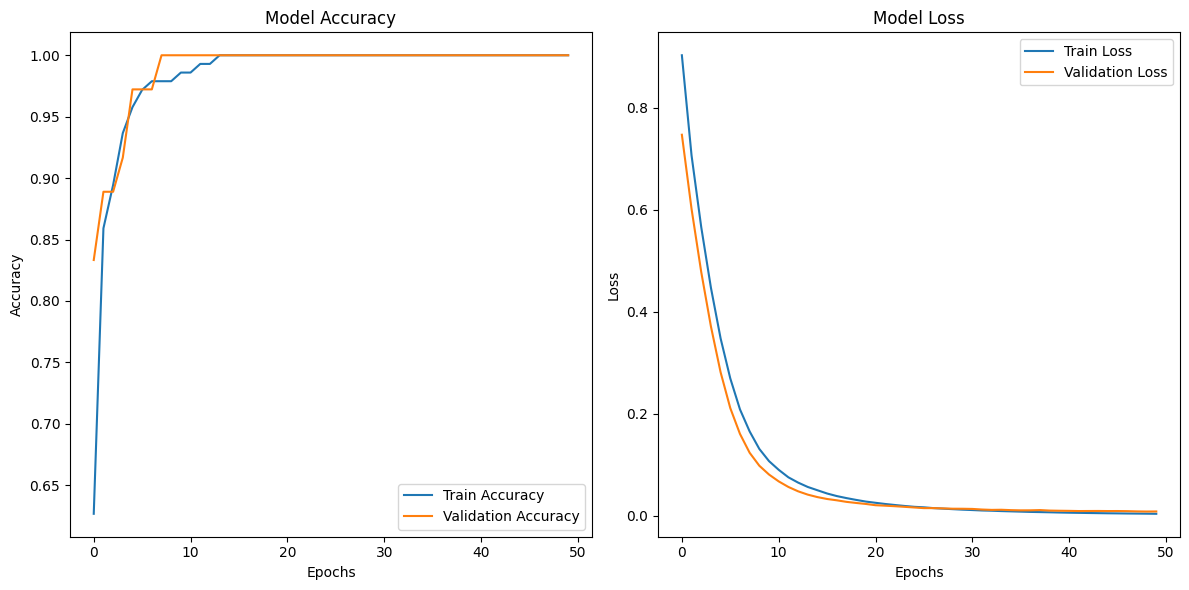

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)  # Corrected argument
y = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Number of classes as output units
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
